#Imports

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clientes.csv to clientes (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
df = pd.read_csv('clientes.csv')
df.head()

,cliente_id,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou
0,1,56,30,27,Centro-Oeste,96.03,1
1,2,69,11,2,Norte,91.22,0
2,3,46,58,21,Sul,56.45,0
3,4,32,55,1,Norte,69.61,0
4,5,60,28,28,Sul,42.19,0


#1

Analise a distribuição de idade, tempo de assinatura, frequência de
uso e região dos clientes que cancelaram e dos novos clientes no
período de 24 meses.

In [ ]:
# Remove espaços das colunas
df.columns = df.columns.str.strip()

# Filtrar clientes com até 24 meses de assinatura
clientes_24_meses = df[df['tempo_assinatura_meses'] <= 24]

# Separar cancelados e ativos
cancelados_24m = clientes_24_meses[clientes_24_meses['cancelou'] == 1]
ativos_24m = clientes_24_meses[clientes_24_meses['cancelou'] == 0]

# Calcular estatísticas comparativas
print("Comparativo entre Cancelados e Ativos (até 24 meses):\n")

print("1. Idade média:")
print(f"   Cancelados: {cancelados_24m['idade'].mean():.2f}")
print(f"   Ativos:     {ativos_24m['idade'].mean():.2f}\n")

print("2. Tempo médio de assinatura (meses):")
print(f"   Cancelados: {cancelados_24m['tempo_assinatura_meses'].mean():.2f}")
print(f"   Ativos:     {ativos_24m['tempo_assinatura_meses'].mean():.2f}\n")

print("3. Frequência média de uso mensal:")
print(f"   Cancelados: {cancelados_24m['frequencia_uso_mensal'].mean():.2f}")
print(f"   Ativos:     {ativos_24m['frequencia_uso_mensal'].mean():.2f}\n")

print("4. Região mais comum:")
print(f"   Cancelados: {cancelados_24m['regiao'].mode()[0]}")
print(f"   Ativos:     {ativos_24m['regiao'].mode()[0]}")

Comparativo entre Cancelados e Ativos (até 24 meses):

1. Idade média:
   Cancelados: 42.00
   Ativos:     49.44

2. Tempo médio de assinatura (meses):
   Cancelados: 11.38
   Ativos:     12.12

3. Frequência média de uso mensal:
   Cancelados: 15.25
   Ativos:     18.12

4. Região mais comum:
   Cancelados: Sudeste
   Ativos:     Sudeste


In [ ]:
ultimos_6_meses = df[df['tempo_assinatura_meses'] <= 6]
mais_24_meses = df[df['tempo_assinatura_meses'] > 24]

cancelados_recente = ultimos_6_meses[ultimos_6_meses['cancelou'] == 1]
cancelados_antigo = mais_24_meses[mais_24_meses['cancelou'] == 1]

print("Comparativo de Cancelamentos")
print("Cancelados Recentes:")
print(cancelados_recente[['idade', 'tempo_assinatura_meses', 'frequencia_uso_mensal']].mean())

print("\nCancelados Antigos:")
print(cancelados_antigo[['idade', 'tempo_assinatura_meses', 'frequencia_uso_mensal']].mean())

Comparativo de Cancelamentos
Cancelados Recentes:
idade                     40.888889
tempo_assinatura_meses     3.222222
frequencia_uso_mensal     11.555556
dtype: float64

Cancelados Antigos:
idade                     44.2500
tempo_assinatura_meses    43.3750
frequencia_uso_mensal     16.0625
dtype: float64


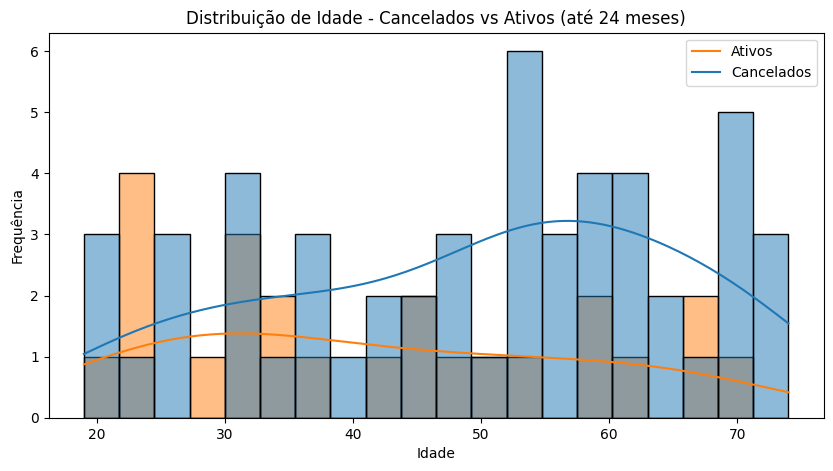

In [ ]:
# Gráfico: Idade
plt.figure(figsize=(10,5))
sns.histplot(data=clientes_24_meses, x="idade", hue="cancelou", kde=True, bins=20)
plt.title("Distribuição de Idade - Cancelados vs Ativos (até 24 meses)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend(["Ativos", "Cancelados"])
plt.show()

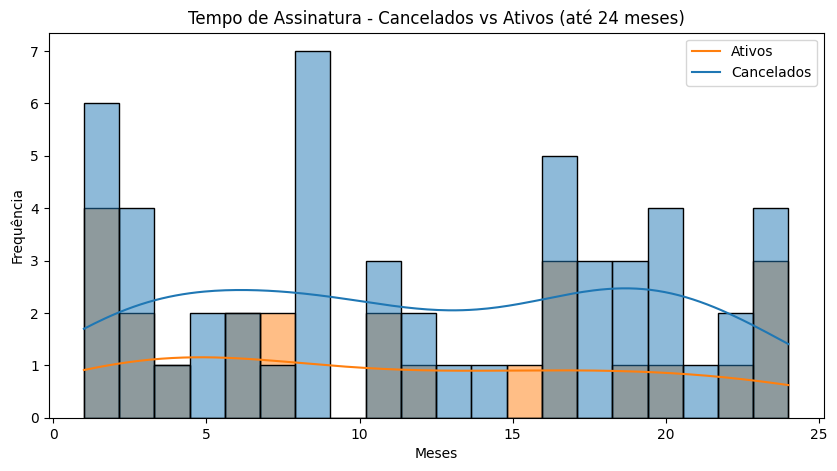

In [ ]:
# Gráfico: Tempo de assinatura
plt.figure(figsize=(10,5))
sns.histplot(data=clientes_24_meses, x="tempo_assinatura_meses", hue="cancelou", kde=True, bins=20)
plt.title("Tempo de Assinatura - Cancelados vs Ativos (até 24 meses)")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.legend(["Ativos", "Cancelados"])
plt.show()

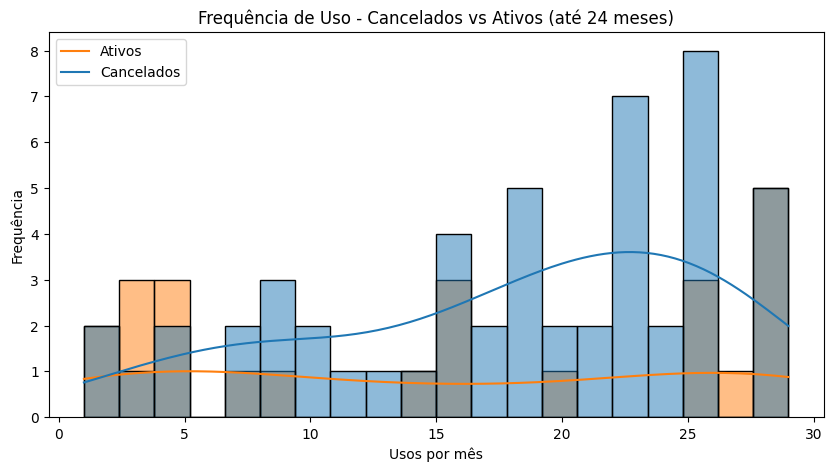

In [ ]:
# Gráfico: Frequência de uso
plt.figure(figsize=(10,5))
sns.histplot(data=clientes_24_meses, x="frequencia_uso_mensal", hue="cancelou", kde=True, bins=20)
plt.title("Frequência de Uso - Cancelados vs Ativos (até 24 meses)")
plt.xlabel("Usos por mês")
plt.ylabel("Frequência")
plt.legend(["Ativos", "Cancelados"])
plt.show()

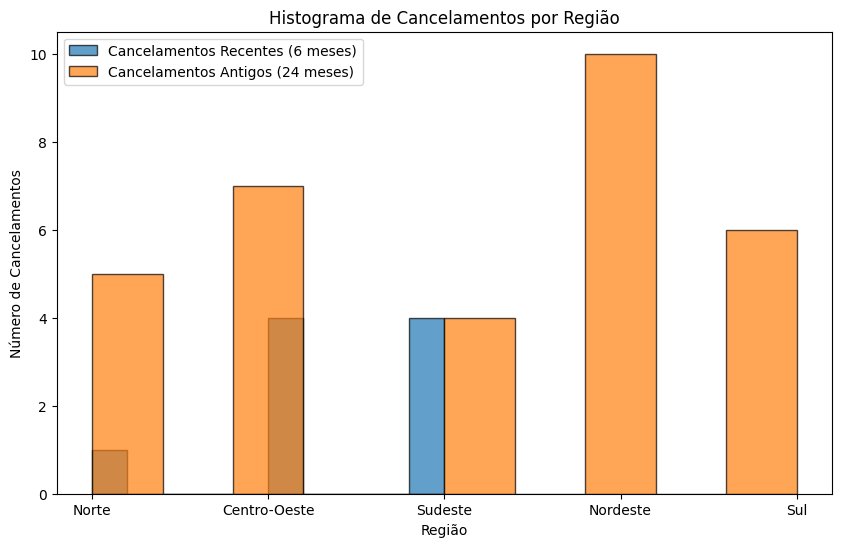

In [ ]:
# Criar a figura e os eixos
plt.figure(figsize=(10,6))

# Histograma para Cancelamentos Recentes
plt.hist(cancelados_recente['regiao'], alpha=0.7, label='Cancelamentos Recentes (6 meses)', bins=10, edgecolor='black')

# Histograma para Cancelamentos Antigos
plt.hist(cancelados_antigo['regiao'], alpha=0.7, label='Cancelamentos Antigos (24 meses)', bins=10, edgecolor='black')

# Títulos e legendas
plt.title('Histograma de Cancelamentos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cancelamentos')
plt.legend()

# Exibir o gráfico
plt.show()

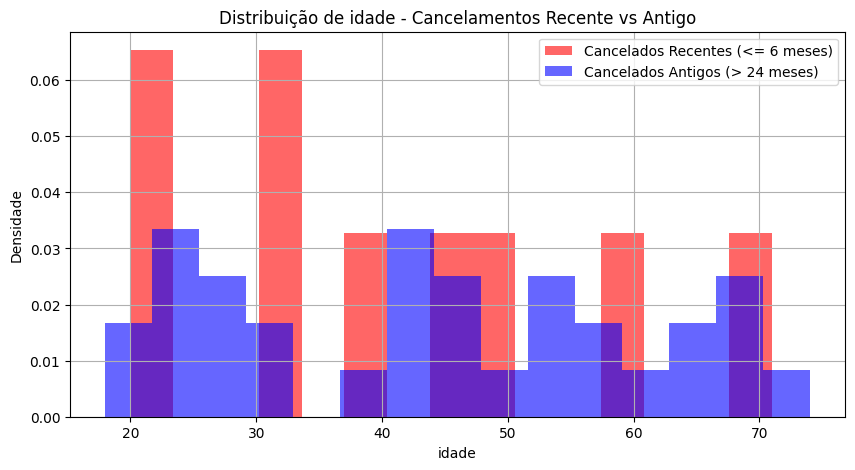

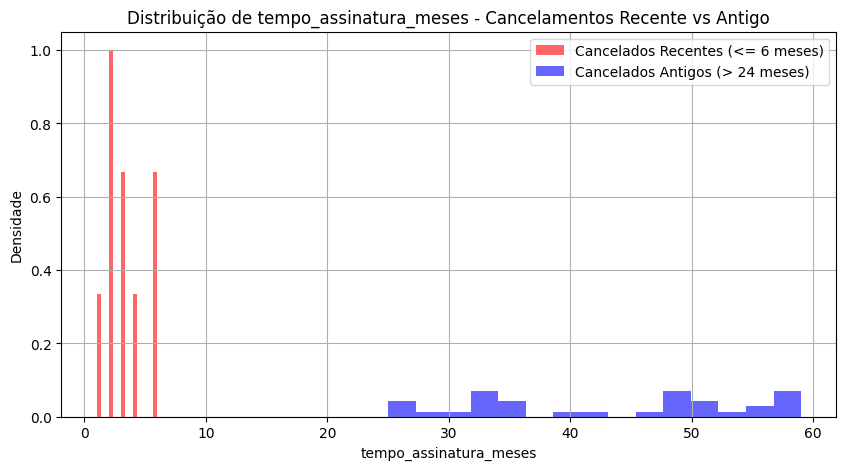

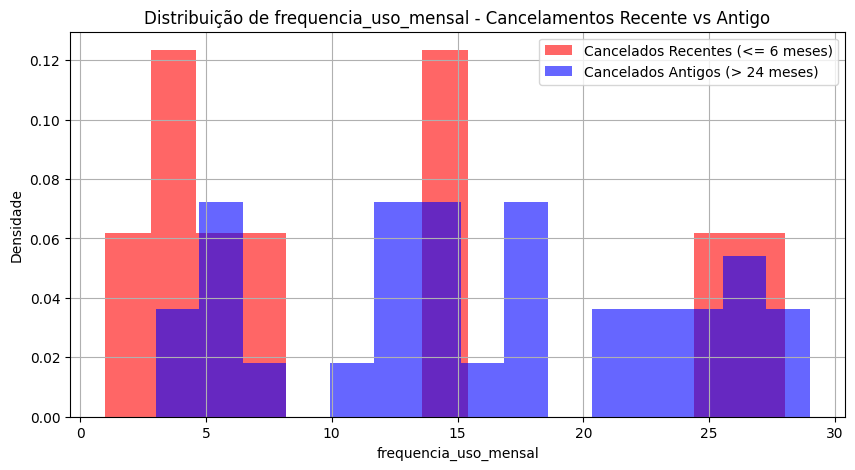

In [ ]:
# Lista de colunas para comparar
variaveis = ['idade', 'tempo_assinatura_meses', 'frequencia_uso_mensal']

# Plotando histogramas
for var in variaveis:
    plt.figure(figsize=(10, 5))
    plt.hist(cancelados_recente[var], bins=15, alpha=0.6, label='Cancelados Recentes (<= 6 meses)', color='red', density=True)
    plt.hist(cancelados_antigo[var], bins=15, alpha=0.6, label='Cancelados Antigos (> 24 meses)', color='blue', density=True)
    plt.title(f'Distribuição de {var} - Cancelamentos Recente vs Antigo')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.show()
    print('\n')

#2

Plote gráficos para identicar padrões nos clientes que mantêm e
cancelam a assinatura.

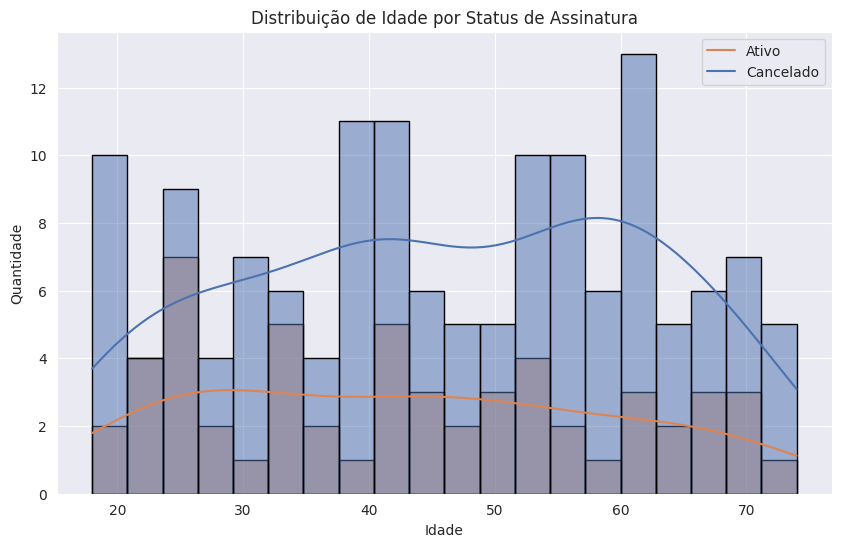

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('deep')

#Distribuição de idade por status de assinatura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='cancelou', kde=True, bins=20, edgecolor="black")
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade por Status de Assinatura')
plt.legend(['Ativo', 'Cancelado'])
plt.show()

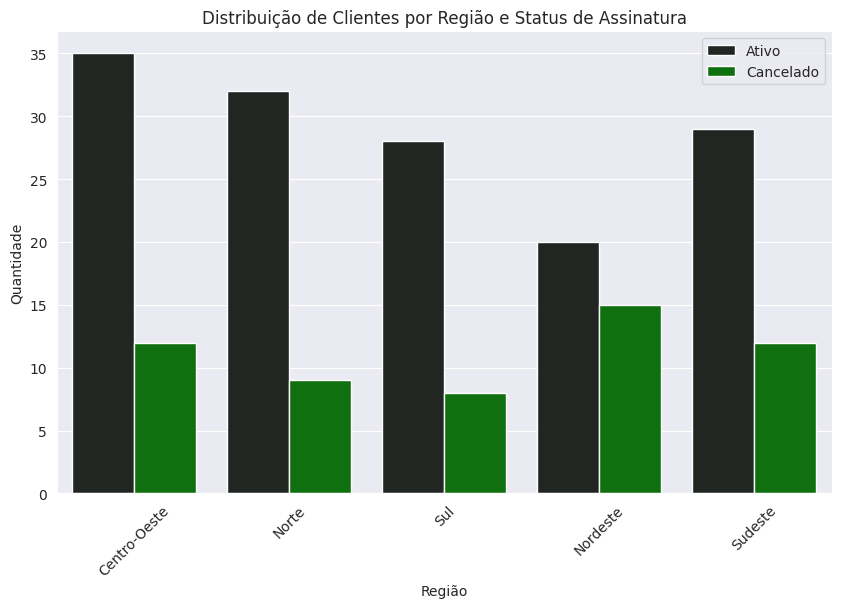

In [ ]:
#Distribuição de região por status de assinatura
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='regiao', hue='cancelou', palette='dark:green')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.title('Distribuição de Clientes por Região e Status de Assinatura')
plt.xticks(rotation=45)
plt.legend(['Ativo', 'Cancelado'])
plt.show()

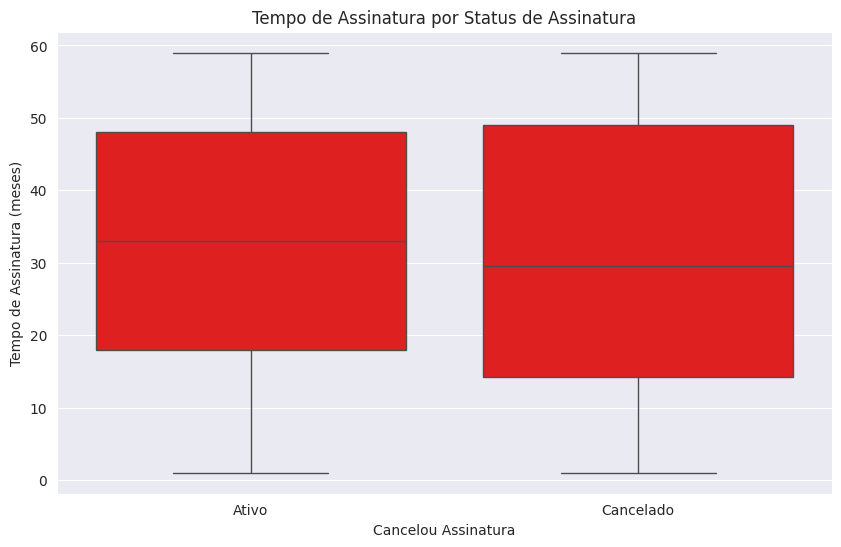

In [ ]:
#Distribuição de Tempo de assinatura por status de assinatura
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cancelou', y='tempo_assinatura_meses', color='red')
plt.xlabel('Cancelou Assinatura')
plt.ylabel('Tempo de Assinatura (meses)')
plt.title('Tempo de Assinatura por Status de Assinatura')
plt.xticks([0, 1], ['Ativo', 'Cancelado'])
plt.show()

#3

Utilize testes estatísticos para vericar se há uma relação
signicativa entre tempo de assinatura e taxa de cancelamento.

In [ ]:
# Teste de normalidade de Shapiro-Wilk para 'tempo_assinatura_meses'
shapiro_tempo = stats.shapiro(df['tempo_assinatura_meses'])
print(f'Teste de normalidade (Shapiro-Wilk) para tempo_assinatura_meses: {shapiro_tempo}')
# Se o p-value for maior que 0,05: significa que a variável segue uma distribuição normal.
# O p-value é 1.29e-06. E é muito menor que 0.05, então não segue uma distribuição normal

Teste de normalidade (Shapiro-Wilk) para tempo_assinatura_meses: ShapiroResult(statistic=np.float64(0.9482660614525372), pvalue=np.float64(1.2887142984596598e-06))


In [ ]:
# Como os dados não são normais, usaremos um teste não paramétrico
# Teste de Mann-Whitney para comparar as distribuições entre cancelados e não cancelados
cancelados = df[df['cancelou'] == 1]['tempo_assinatura_meses']
nao_cancelados = df[df['cancelou'] == 0]['tempo_assinatura_meses']

mannwhitney_stat, mannwhitney_pvalue = stats.mannwhitneyu(cancelados, nao_cancelados)
print(f'Teste de Mann-Whitney: Estatística={mannwhitney_stat}, p-valor={mannwhitney_pvalue}')
# Se o p-value do teste for menor que 0,05: podemos concluir que existe uma diferença significativa.
# Se for maior que 0,05: não há diferença significativa entre os grupos de tempo de assinatura e taxa de cancelamento.
# O p-value do teste foi 0.5278, que é maior que 0,05. Isso significa que não há diferença estatisticamente significativa entre os tempos de assinatura dos clientes que cancelaram (1) e os que não cancelaram (0).

Teste de Mann-Whitney: Estatística=3799.5, p-valor=0.5277510336313462


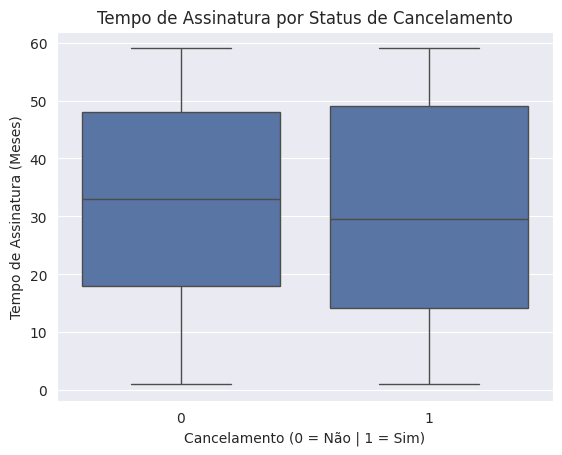

In [ ]:
# Boxplot
sns.boxplot(x='cancelou', y='tempo_assinatura_meses', data=df)
plt.title('Tempo de Assinatura por Status de Cancelamento')
plt.xlabel('Cancelamento (0 = Não | 1 = Sim)')
plt.ylabel('Tempo de Assinatura (Meses)')
plt.show()

#4

Suponha agora que os dados recebidos são somente uma amostra
da sua população total de clientes. Suponha que a sua "população" de
clientes verdadeira é de 100000. Qual o tamanho da amostra
necessária para chegarmos a conclusões com 95% de confiança e 2%
de margem de erro? A base informada é suciente? E com uma
margem de erro de 10%?

In [ ]:
# Definindo o desvio padrão amostral
desvio_padrao = np.std(df['cliente_id'], ddof=1)

a = 0.05 # Valor de alpha
z = norm.ppf(1-a/2)  # Calculando o valor crítico para 95% de confiança

mg_erro_2 = 0.02 # Margem de erro de 2%
mg_erro_10 = 0.1 # Margem de erro de 10%
populacao = 100000 # Tamanho da população

# Cálculo do tamanho da amostra para média (sem correção de população finita)
calc_amostra_est_media_2 = round(((z * desvio_padrao) / mg_erro_2) ** 2, 0)
calc_amostra_est_media_10 = round(((z * desvio_padrao) / mg_erro_10) ** 2, 0)

# Correção para população finita
amostra_mg2 = round((populacao * calc_amostra_est_media_2) / (populacao - 1 + calc_amostra_est_media_2))
amostra_mg10 = round((populacao * calc_amostra_est_media_10) / (populacao - 1 + calc_amostra_est_media_10))

# Exibindo o resultado
print('Tamanho das amostras com 95% de confiança:')
print(f'Margem de erro de 2%: {amostra_mg2} clientes')
print(f'Margem de erro de 10%: {amostra_mg10} clientes')

Tamanho das amostras com 95% de confiança:
Margem de erro de 2%: 99690 clientes
Margem de erro de 10%: 92790 clientes


#Conclusão

✅ 1️⃣ O perfil dos clientes que cancelam hoje é diferente do perfil dos clientes que cancelaram anteriormente?

Sim, as diferenças entre os perfis são:
- Idade média em anos: 40,9 | 44,3
- Tempo de assinatura em meses: 3,2 | 43,4
- Frequência de uso mensal: 11,6 | 16,1
-Mensalidade média em R\$: 60,36 | 60,88

✅ 2️⃣ Quais são as principais diferenças entre os perfis?

📉 Tempo de assinatura: canceladores recentes permanecem muito menos tempo na plataforma.

👤 Idade: usuários antigos que cancelaram tendem a ser um pouco mais velhos.

📺 Frequência de uso: usuários antigos que cancelaram usavam mais o serviço.

💸 Mensalidade: é semelhante entre os grupos, não sendo um fator chave na decisão de cancelar.

Essas diferenças sugerem que:

Estratégias de retenção deveriam focar nos primeiros 6 meses do cliente.

Incentivar uso frequente desde o início pode aumentar retenção.

Campanhas direcionadas por faixa etária podem ser úteis.